## Import Library

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import pinv
from sklearn import linear_model 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 


## Input Dataset

In [2]:
df = pd.read_csv('QB2022.csv')
df.head()

,Player,Cmp %,Rate
0,Jared Goff,65.1,99.3
1,Josh Allen,63.3,96.6
2,Geno Smith,69.8,100.9
3,Trevor Lawrence,66.3,95.2
4,Jalen Hurts,66.5,101.6


## Linear Regression By Uing inv OR pinv

a) Create a simple linear regression model that would predict the rating based on completion percentage using linear algebra approach (inv or pinv). Provide the model parameters.

In [3]:
b = np.array(df['Rate'])
b.shape

(70,)

The output of b.shape will be a tuple indicating the number of rows in the 'Rate' column.

In [4]:
input_data = df['Cmp %']
A = np.array([np.ones(df['Cmp %'].shape[0]),df['Cmp %']])
A = A.T
A.shape

(70, 2)

In [5]:
x = pinv(A.T@A)@A.T@b
x

array([-33.12240452,   1.84893148])

x is a 2D array representing the coefficients of the linear regression model.
The first element is the intercept, which is the constant term in the equation that predicts the Rate.
The second element is the slope, which is the coefficient of the Cmp % variable.

In [6]:
A = A.T

In [7]:
predict_output_data = np.array(input_data).reshape(-1,1) * x[1] + x[0]
predict_output_data.shape

(70, 1)

### If the completion percentage for Patrick Mahomes is 67.1%, use your model to predict his rating in 2022. Use whatever method you like.

In [8]:
predict = np.array([1, 67.1])@x
predict

90.94089806406792

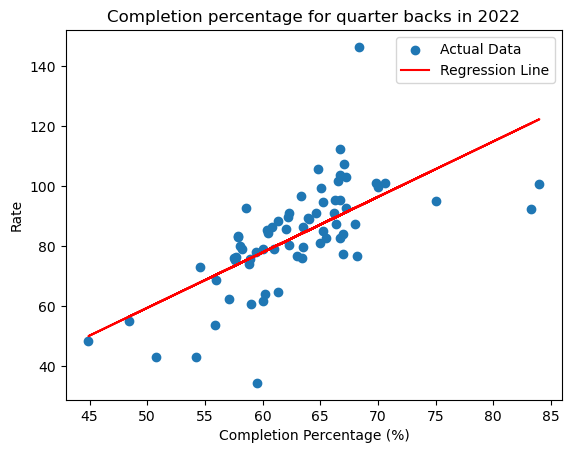

In [9]:
plt.scatter(input_data, b, label='Actual Data')
plt.plot(input_data, predict_output_data, color='red', label='Regression Line')
plt.xlabel('Completion Percentage (%)')
plt.ylabel('Rate')
plt.title('Completion percentage for quarter backs in 2022')
plt.legend()
plt.show()

### If his true rating is 105.2, what is the squared error that your model commits in predicting his rating.

In [10]:
squared_error = (predict - 105.2) ** 2
squared_error

203.32198801930198

## Linear Regression By Uing Sklearn Package

b) Repeat the above using the library in sklearn. Provide the model parameters.

In [11]:
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [12]:
reg.fit(np.array(input_data).reshape(-1,1),np.array(b).reshape(-1,1))

LinearRegression()

In [13]:
reg.intercept_

array([-33.12240452])

In [14]:
reg.coef_

array([[1.84893148]])

The code trains a linear regression model using scikit-learn and then retrieves the intercept and slope coefficients, which can be used to make predictions about the Rate based on the Cmp %.

### If the completion percentage for Patrick Mahomes is 67.1%, use your model to predict his rating in 2022. Use whatever method you like.

c) If the completion percentage for Patrick Mahomes is 67.1%, use your model to predict his rating in 2022. Use whatever method you like

In [15]:
predict = reg.predict(np.array([67.1]).reshape(-1,1))
predict

array([[90.94089806]])

In [16]:
predict_output_data = np.array(input_data).reshape(-1,1) * reg.coef_ + reg.intercept_
predict_output_data.shape

(70, 1)

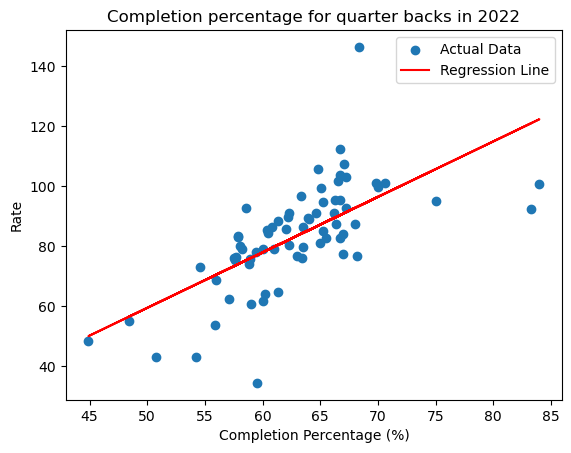

In [17]:
plt.scatter(input_data, b, label='Actual Data')
plt.plot(input_data, predict_output_data, color='red', label='Regression Line')
plt.xlabel('Completion Percentage (%)')
plt.ylabel('Rate')
plt.title('Completion percentage for quarter backs in 2022')
plt.legend()
plt.show()

### If his true rating is 105.2, what is the squared error that your model commits in predicting his rating.

In [18]:
squared_error = (predict - 105.2) ** 2
squared_error

array([[203.32198802]])

The code calculates the difference between the true rating and the predicted rating, then squares it to get the squared error.